In [1]:
import pandas as pd

In [2]:
cdf = pd.read_csv('Customers.csv')
pdf = pd.read_csv('Products.csv')
tdf = pd.read_csv('Transactions.csv')

### Data Sample

In [3]:
cdf.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
pdf.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [5]:
tdf.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


### Data Size

In [6]:
print(cdf.shape)
print(pdf.shape)
print(tdf.shape)

(200, 4)
(100, 4)
(1000, 7)


### Checking Duplicate and Null Values

In [7]:
print(cdf['CustomerID'].nunique())
print(pdf['ProductID'].nunique())
print(tdf['TransactionID'].nunique())

200
100
1000


In [8]:
print(cdf.isnull().sum())
print(pdf.isnull().sum())
print(tdf.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


## Customer Analysis

There are a total of 200 unique customers.

#### Distribution of customers across regions:

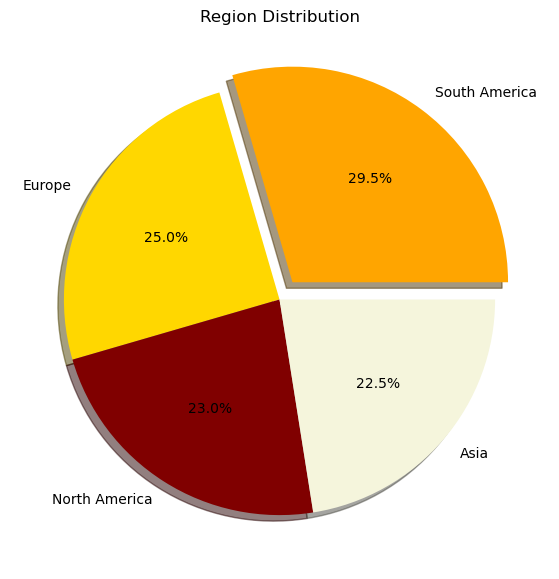

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


In [9]:
import numpy as np
import matplotlib.pyplot as plt

region_counts = cdf['Region'].value_counts()

max_index = np.argmax(region_counts.values)
explode = [0.1 if i == max_index else 0 for i in range(len(region_counts))]  # Explode the largest region

fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(
    region_counts.values, labels=region_counts.index, autopct='%1.1f%%', explode=explode, shadow=True,
    colors=['orange', 'gold', 'maroon', 'beige']
)

plt.title("Region Distribution")
plt.show()

print(region_counts)

29.5% of customers are from South America

#### Signup Trend:

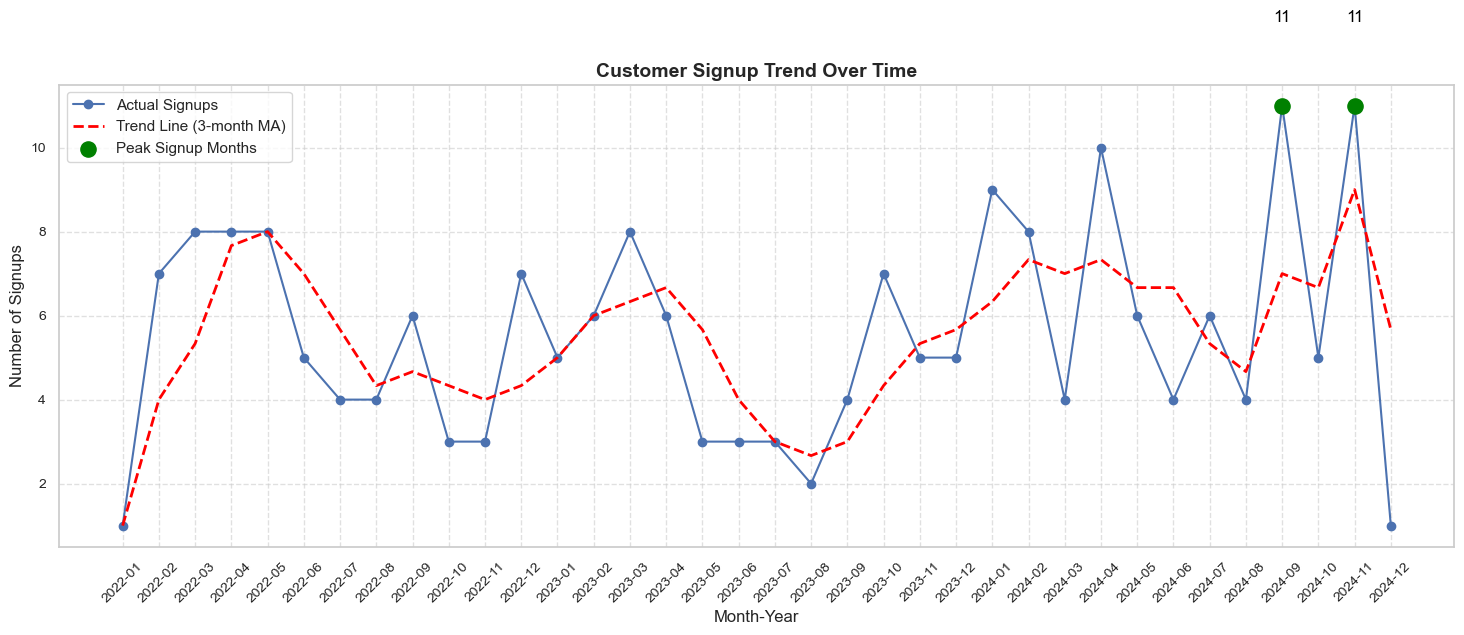

In [72]:
import seaborn as sns

cdf["SignupDate"] = pd.to_datetime(cdf["SignupDate"])

cdf["YearMonth"] = cdf["SignupDate"].dt.to_period("M")

signup_trend = cdf.groupby("YearMonth")["CustomerID"].count().reset_index()
signup_trend["YearMonth"] = signup_trend["YearMonth"].astype(str)  # Convert period to string

signup_trend["Trend"] = signup_trend["CustomerID"].rolling(window=3, min_periods=1).mean()

max_signups = signup_trend["CustomerID"].max()
peak_months = signup_trend[signup_trend["CustomerID"] == max_signups]

sns.set_theme(style="whitegrid")

plt.figure(figsize=(18, 6))
plt.plot(signup_trend["YearMonth"], signup_trend["CustomerID"], marker="o", linestyle="-", color="b", label="Actual Signups")
plt.plot(signup_trend["YearMonth"], signup_trend["Trend"], linestyle="--", color="red", linewidth=2, label="Trend Line (3-month MA)")

plt.scatter(peak_months["YearMonth"], peak_months["CustomerID"], color="green", s=120, label="Peak Signup Months", zorder=3)
for _, row in peak_months.iterrows():
    plt.text(row["YearMonth"], row["CustomerID"] + 2, f"{row['CustomerID']}", ha="center", fontsize=12, color="black")

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("Number of Signups", fontsize=12)
plt.title("Customer Signup Trend Over Time", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

There are two peak signup months (11 signups) September 2024 and December 2024 after that there is a sudden fall.
The signups show a considerable amount of variation month-to-month, indicating potential volatility in customer acquisition. The data is somehow following a pattern but the intensity of change is different.

## Product Analysis

There are total 100 unique products.

In [11]:
products = pdf["Category"].unique()

print("List of Category:")
for i, name in enumerate(products, start=1):
    print(f"{i}. {name}")

List of Category:
1. Books
2. Electronics
3. Home Decor
4. Clothing


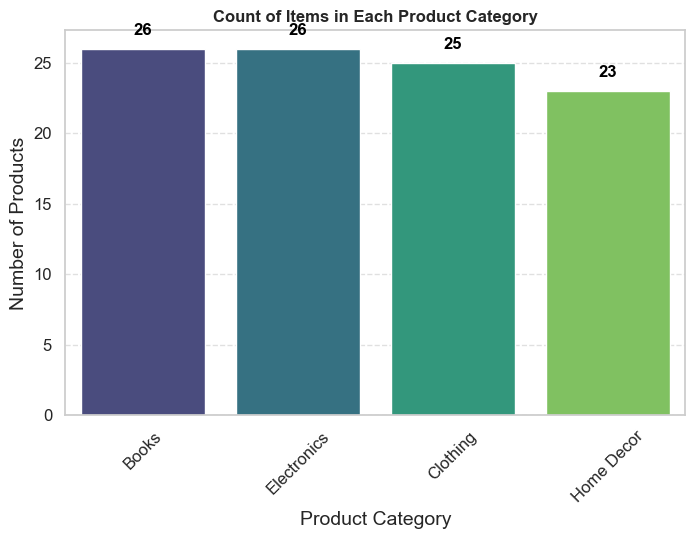

In [39]:
category_counts = pdf["Category"].value_counts().reset_index()
category_counts.columns = ["Category", "Count"]

sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 5))
barplot = sns.barplot(x="Category", y="Count", data=category_counts, palette="viridis")

for index, row in category_counts.iterrows():
    barplot.text(index, row["Count"] + 1, str(row["Count"]), ha="center", fontsize=12, fontweight="bold", color="black")

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Product Category", fontsize=14)
plt.ylabel("Number of Products", fontsize=14)
plt.title("Count of Items in Each Product Category", fontsize=12, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()


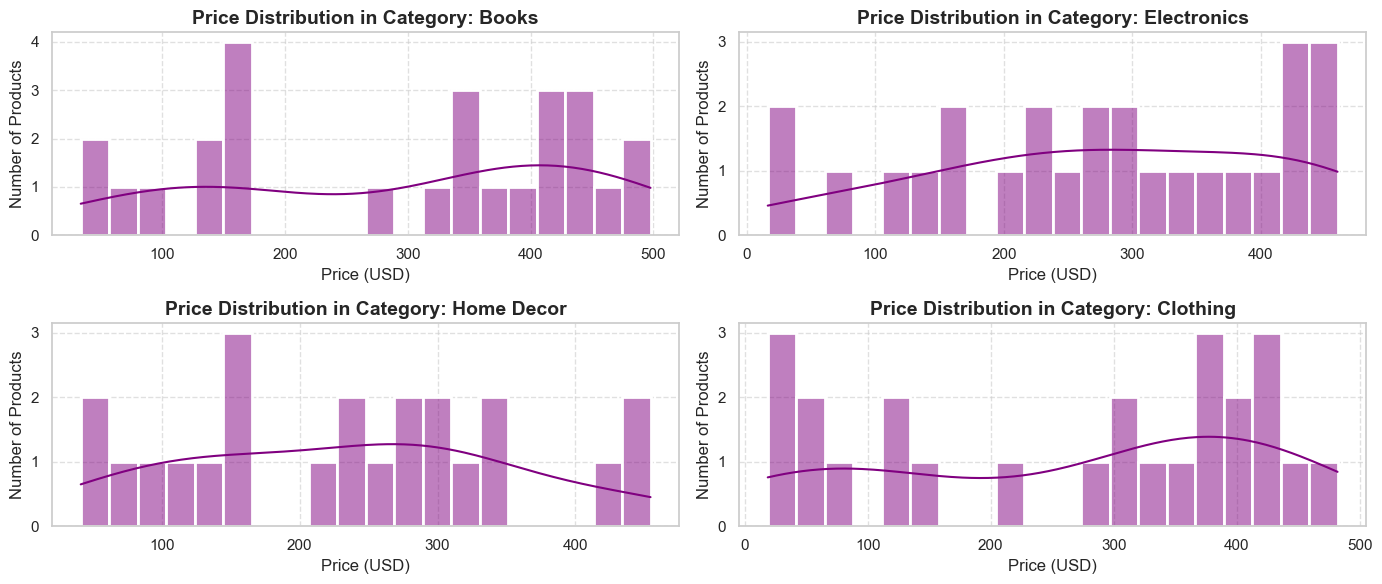

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
products = pd.read_csv("Products.csv")

# Set Seaborn theme for better aesthetics
sns.set_theme(style="whitegrid")

# Get unique categories
categories = products["Category"].unique()

# Define the number of rows and columns for the 2x2 grid
n_rows = 2
n_cols = 2

# If there are fewer categories than 4, adjust the layout
if len(categories) <= 4:
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 6))
else:
    # If there are more than 4 categories, create a larger grid
    n_rows = int(np.ceil(len(categories) / n_cols))  # Adjust rows for more categories
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 5 * n_rows))

# Flatten axes for easy indexing
axes = axes.flatten()

# Loop through each category and create a histogram
for i, category in enumerate(categories):
    # Filter products by category
    category_data = products[products["Category"] == category]
    
    # Plot histogram
    sns.histplot(category_data["Price"], kde=True, bins=20, ax=axes[i], color="purple", linewidth=2)
    
    # Formatting for each subplot
    axes[i].set_title(f"Price Distribution in Category: {category}", fontsize=14, fontweight="bold")
    axes[i].set_xlabel("Price (USD)", fontsize=12)
    axes[i].set_ylabel("Number of Products", fontsize=12)
    axes[i].grid(True, linestyle="--", alpha=0.6)

# Remove any empty subplots if there are fewer categories than slots
for j in range(len(categories), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to make room for titles and labels
plt.tight_layout()
plt.show()


## Purchase Analysis

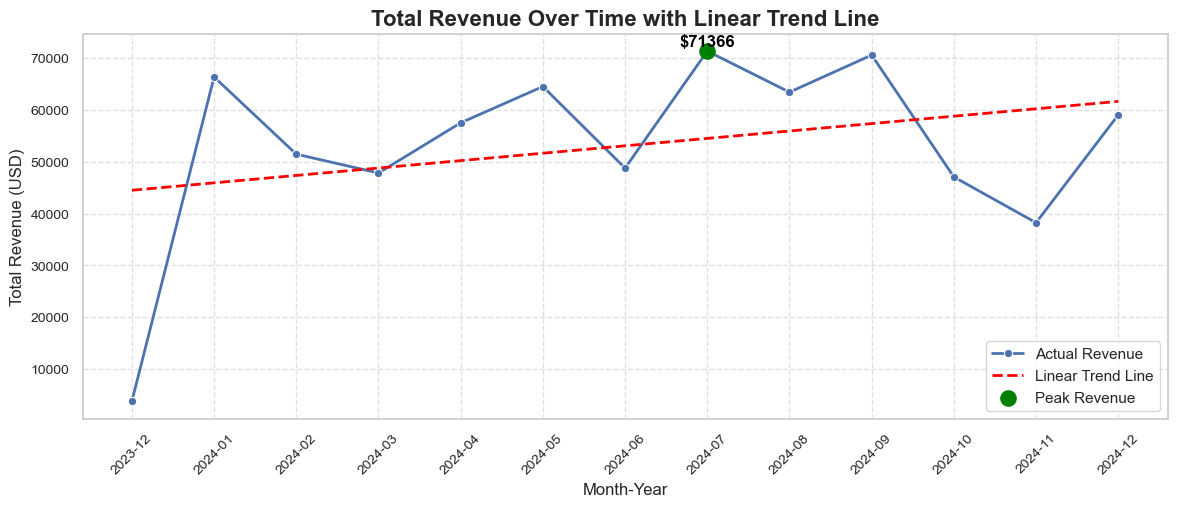

In [79]:
tdf["TransactionDate"] = pd.to_datetime(tdf["TransactionDate"])

tdf["YearMonth"] = tdf["TransactionDate"].dt.to_period("M")

revenue_trend = tdf.groupby("YearMonth")["TotalValue"].sum().reset_index()
revenue_trend["YearMonth"] = revenue_trend["YearMonth"].astype(str)

revenue_trend["MonthIndex"] = np.arange(len(revenue_trend))

slope, intercept = np.polyfit(revenue_trend["MonthIndex"], revenue_trend["TotalValue"], 1)
revenue_trend["TrendLine"] = slope * revenue_trend["MonthIndex"] + intercept

max_revenue = revenue_trend["TotalValue"].max()
peak_months = revenue_trend[revenue_trend["TotalValue"] == max_revenue]

sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 5))
sns.lineplot(data=revenue_trend, x="YearMonth", y="TotalValue", marker="o", color="b", linewidth=2, label="Actual Revenue")
sns.lineplot(data=revenue_trend, x="YearMonth", y="TrendLine", linestyle="--", color="red", linewidth=2, label="Linear Trend Line")
plt.scatter(peak_months["YearMonth"], peak_months["TotalValue"], color="green", s=120, label="Peak Revenue", zorder=3)

for _, row in peak_months.iterrows():
    plt.text(row["YearMonth"], row["TotalValue"] + 1000, f"${row['TotalValue']:.0f}", 
             ha="center", fontsize=12, color="black", fontweight="bold")

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("Total Revenue (USD)", fontsize=12)
plt.title("Total Revenue Over Time with Linear Trend Line", fontsize=16, fontweight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

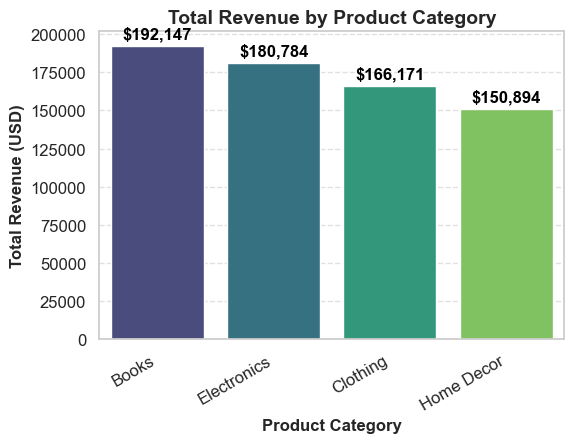

In [86]:
merged_df = tdf.merge(pdf, on="ProductID")

# Calculate total revenue per category
category_revenue = merged_df.groupby("Category")["TotalValue"].sum().reset_index()

# Sort categories by revenue
category_revenue = category_revenue.sort_values(by="TotalValue", ascending=False)

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Increase figure size for better visualization
plt.figure(figsize=(6, 4))

# Create bar plot
barplot = sns.barplot(x="Category", y="TotalValue", data=category_revenue, palette="viridis")

# Properly align labels on top of bars
for bar in barplot.patches:
    bar_height = bar.get_height()  # Get height (TotalValue)
    bar_x = bar.get_x() + bar.get_width() / 2  # Center label on bar
    plt.text(bar_x, bar_height + 5000, f"${bar_height:,.0f}", 
             ha="center", fontsize=12, fontweight="bold", color="black")

# Formatting the plot
plt.xticks(rotation=30, ha="right", fontsize=12)  # Rotate labels for better readability
plt.yticks(fontsize=12)
plt.xlabel("Product Category", fontsize=12, fontweight="bold")
plt.ylabel("Total Revenue (USD)", fontsize=12, fontweight="bold")
plt.title("Total Revenue by Product Category", fontsize=14, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show the plot
plt.show()

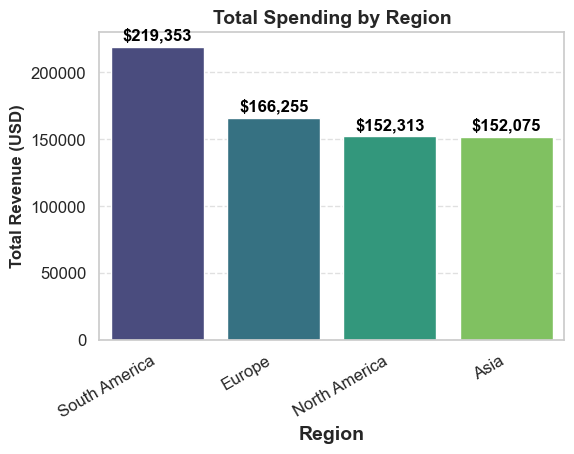


          Region  TotalValue  AvgTransactionValue
3  South America   219352.56           721.554474
1         Europe   166254.63           710.489872
2  North America   152313.40           624.235246
0           Asia   152074.97           697.591606


In [83]:
merged_df = tdf.merge(cdf, on="CustomerID")

region_spending = merged_df.groupby("Region")["TotalValue"].sum().reset_index()
region_spending["AvgTransactionValue"] = merged_df.groupby("Region")["TotalValue"].mean().values

region_spending = region_spending.sort_values(by="TotalValue", ascending=False)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(6, 4))

barplot = sns.barplot(x="Region", y="TotalValue", data=region_spending, palette="viridis")

for bar in barplot.patches:
    bar_height = bar.get_height()
    bar_x = bar.get_x() + bar.get_width() / 2
    plt.text(bar_x, bar_height + 5000, f"${bar_height:,.0f}", 
             ha="center", fontsize=12, fontweight="bold", color="black")

plt.xticks(rotation=30, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Region", fontsize=14, fontweight="bold")
plt.ylabel("Total Revenue (USD)", fontsize=12, fontweight="bold")
plt.title("Total Spending by Region", fontsize=14, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

print()
print(region_spending)

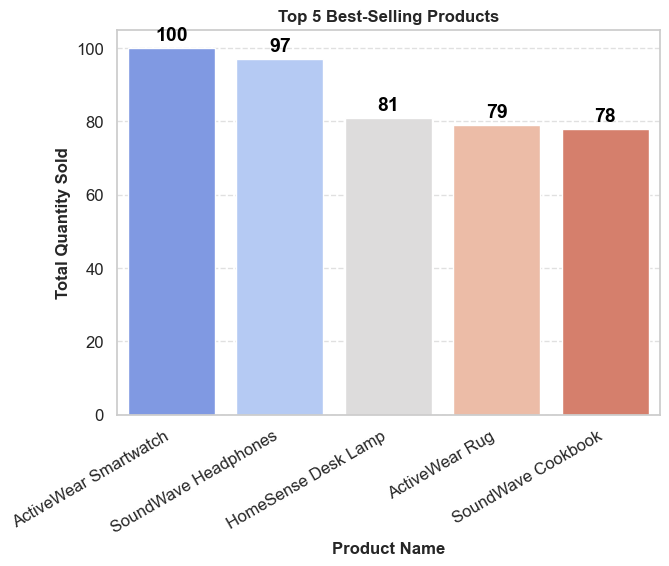

In [87]:
merged_df = tdf.merge(pdf, on="ProductID")

top_products = merged_df.groupby("ProductName")["Quantity"].sum().reset_index()
top_products = top_products.sort_values(by="Quantity", ascending=False)
top_5_products = top_products.head(5)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(7, 5))

barplot = sns.barplot(x="ProductName", y="Quantity", data=top_5_products, palette="coolwarm")

for bar in barplot.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 2, f"{int(height)}",
             ha="center", fontsize=14, fontweight="bold", color="black")

plt.xticks(rotation=30, ha="right", fontsize=12)  # Rotate labels for better visibility
plt.yticks(fontsize=12)
plt.xlabel("Product Name", fontsize=12, fontweight="bold")
plt.ylabel("Total Quantity Sold", fontsize=12, fontweight="bold")
plt.title("Top 5 Best-Selling Products", fontsize=12, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

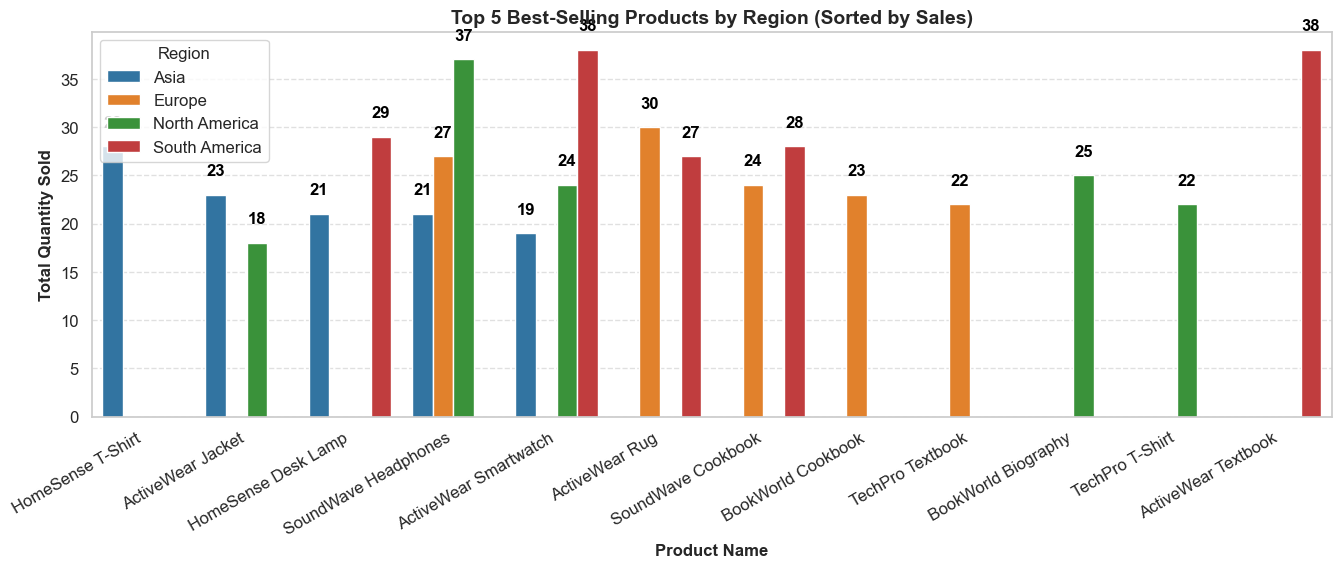

In [89]:
merged_df = tdf.merge(pdf, on="ProductID").merge(cdf, on="CustomerID")

region_product_sales = merged_df.groupby(["Region", "ProductName"])["Quantity"].sum().reset_index()

region_product_sales = region_product_sales.sort_values(["Region", "Quantity"], ascending=[True, False])

region_product_sales["Rank"] = region_product_sales.groupby("Region")["Quantity"].rank(method="first", ascending=False)
top_5_region_products = region_product_sales[region_product_sales["Rank"] <= 5]

top_5_region_products = top_5_region_products.sort_values(["Region", "Quantity"], ascending=[True, False])

sns.set_theme(style="whitegrid")

plt.figure(figsize=(16, 5))
barplot = sns.barplot(x="ProductName", y="Quantity", hue="Region", data=top_5_region_products, palette="tab10")

for bar in barplot.patches:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width() / 2, height + 2, f"{int(height)}", 
                 ha="center", fontsize=12, fontweight="bold", color="black")

plt.xticks(rotation=30, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Product Name", fontsize=12, fontweight="bold")
plt.ylabel("Total Quantity Sold", fontsize=12, fontweight="bold")
plt.title("Top 5 Best-Selling Products by Region (Sorted by Sales)", fontsize=14, fontweight="bold")
plt.legend(title="Region", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

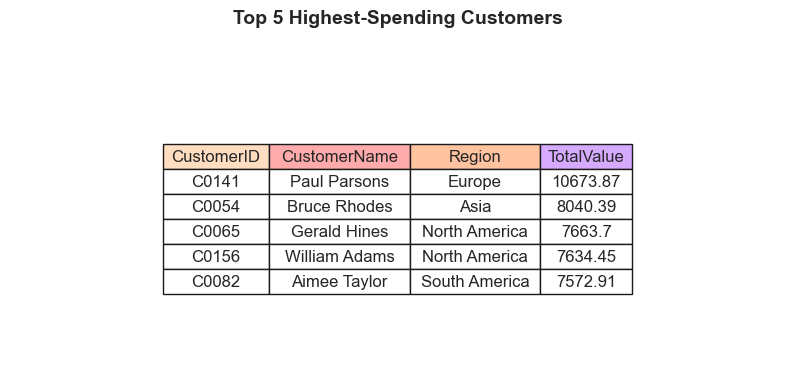

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
transactions = pd.read_csv("Transactions.csv")
customers = pd.read_csv("Customers.csv")

# Merge transactions with customers to get full customer details
merged_df = transactions.merge(products, on="ProductID").merge(customers, on="CustomerID")

# Calculate total spending per customer
customer_spending = merged_df.groupby(["CustomerID", "CustomerName", "Region"])["TotalValue"].sum().reset_index()

# Format TotalValue to 2 decimal places
customer_spending["TotalValue"] = customer_spending["TotalValue"].round(2)

# Sort customers by total spending (highest first) and select top 5
top_5_customers = customer_spending.sort_values(by="TotalValue", ascending=False).head(5)

# Set Seaborn style for better aesthetics
sns.set_theme(style="whitegrid")

# Create a figure
fig, ax = plt.subplots(figsize=(10, 4))

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table with padding
table = plt.table(cellText=top_5_customers.values, 
                  colLabels=top_5_customers.columns, 
                  cellLoc="center", 
                  loc="center",
                  colColours=["#FFDDC1", "#FFABAB", "#FFC3A0", "#D5AAFF"])  # Soft pastel header colors

# Adjust table style for better spacing
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width([0, 1, 2, 3])  # Adjust column widths
table.scale(1.2, 1.5)  # Scale table for better spacing (1.2x width, 1.5x height)

# Set title
plt.title("Top 5 Highest-Spending Customers", fontsize=14, fontweight="bold", pad=30)

# Show the table
plt.show()
